In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

581

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7b7828bcf35f03b0fa7cdf0efdfdec9


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | vanavara
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | san policarpo
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | maposeni
Processing Record 9 of Set 1 | falealupo
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | the pas
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | tadine
Processing Record 14 of Set 1 | athabasca
Processing Record 15 of Set 1 | gat
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | porbandar
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of

Processing Record 38 of Set 4 | shimoda
Processing Record 39 of Set 4 | nantucket
Processing Record 40 of Set 4 | qiongshan
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | ilhabela
Processing Record 44 of Set 4 | ugoofaaru
Processing Record 45 of Set 4 | carlsbad
Processing Record 46 of Set 4 | drumheller
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | hambantota
Processing Record 49 of Set 4 | ambovombe
Processing Record 50 of Set 4 | bowen
Processing Record 1 of Set 5 | tondano
Processing Record 2 of Set 5 | kathmandu
Processing Record 3 of Set 5 | dzhubga
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | port-gentil
Processing Record 6 of Set 5 | ciras
City not found. Skipping...
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | miri
Processing Record 9 of Set 5 | terre-de-bas
Processing Record 10 of Set 5 | severo-kurilsk
Processing Reco

Processing Record 27 of Set 8 | burica
City not found. Skipping...
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | sept-iles
Processing Record 30 of Set 8 | duz
City not found. Skipping...
Processing Record 31 of Set 8 | virginia beach
Processing Record 32 of Set 8 | gambissara
Processing Record 33 of Set 8 | ormara
Processing Record 34 of Set 8 | dedza
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | malatya
Processing Record 37 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 38 of Set 8 | khandyga
Processing Record 39 of Set 8 | tarko-sale
Processing Record 40 of Set 8 | quang ngai
Processing Record 41 of Set 8 | lashio
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | tandalti
Processing Record 44 of Set 8 | bahia blanca
Processing Record 45 of Set 8 | pochutla
Processing Record 46 of Set 8 | povenets
Processing Record 47 of Set 8 | torbay
Processing Record 48 of Set 8

Processing Record 18 of Set 12 | sao felix do xingu
Processing Record 19 of Set 12 | trincomalee
Processing Record 20 of Set 12 | pisco
Processing Record 21 of Set 12 | buritis
Processing Record 22 of Set 12 | samsun
Processing Record 23 of Set 12 | paris
Processing Record 24 of Set 12 | biak
Processing Record 25 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 26 of Set 12 | arman
Processing Record 27 of Set 12 | nizhniye vyazovyye
Processing Record 28 of Set 12 | oranjestad
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | lerwick
Processing Record 31 of Set 12 | kieta
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

535

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,69.96,100,75,0.00,TO,2021-11-23 16:51:05
1,Bluff,-46.6000,168.3333,52.14,80,60,12.21,NZ,2021-11-23 16:51:05
2,Talnakh,69.4865,88.3972,9.43,90,98,11.95,RU,2021-11-23 16:51:05
3,Vanavara,60.3400,102.2797,10.20,99,95,4.07,RU,2021-11-23 16:51:06
4,Albany,42.6001,-73.9662,37.15,51,4,1.01,US,2021-11-23 16:51:06
5,San Policarpo,12.1791,125.5072,80.29,84,99,12.08,PH,2021-11-23 16:51:06
6,Grindavik,63.8424,-22.4338,34.27,86,75,6.91,IS,2021-11-23 16:51:07
7,Maposeni,-10.5833,35.4000,82.76,23,81,4.61,TZ,2021-11-23 16:51:07
8,Port Alfred,-33.5906,26.8910,62.71,67,61,19.86,ZA,2021-11-23 16:51:08
9,The Pas,53.8251,-101.2541,19.42,93,90,11.50,CA,2021-11-23 16:51:08


In [12]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-11-23 16:51:05,-21.2000,-175.2000,69.96,100,75,0.00
1,Bluff,NZ,2021-11-23 16:51:05,-46.6000,168.3333,52.14,80,60,12.21
2,Talnakh,RU,2021-11-23 16:51:05,69.4865,88.3972,9.43,90,98,11.95
3,Vanavara,RU,2021-11-23 16:51:06,60.3400,102.2797,10.20,99,95,4.07
4,Albany,US,2021-11-23 16:51:06,42.6001,-73.9662,37.15,51,4,1.01
5,San Policarpo,PH,2021-11-23 16:51:06,12.1791,125.5072,80.29,84,99,12.08
6,Grindavik,IS,2021-11-23 16:51:07,63.8424,-22.4338,34.27,86,75,6.91
7,Maposeni,TZ,2021-11-23 16:51:07,-10.5833,35.4000,82.76,23,81,4.61
8,Port Alfred,ZA,2021-11-23 16:51:08,-33.5906,26.8910,62.71,67,61,19.86
9,The Pas,CA,2021-11-23 16:51:08,53.8251,-101.2541,19.42,93,90,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

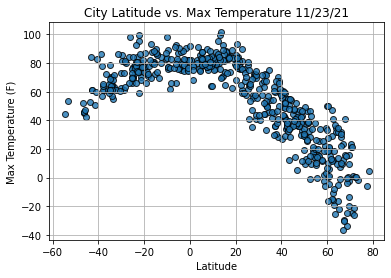

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.jpg")

# Show plot.
plt.show()

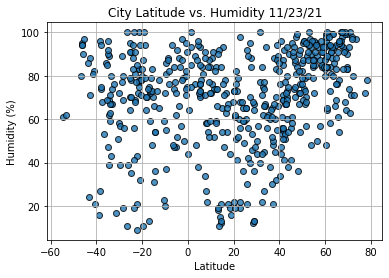

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.jpg")

# Show plot.
plt.show()

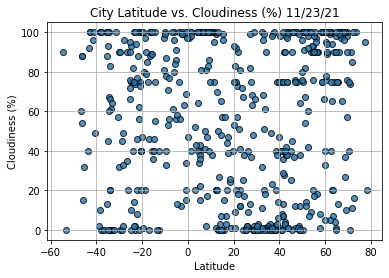

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.jpg")

# Show plot.
plt.show()

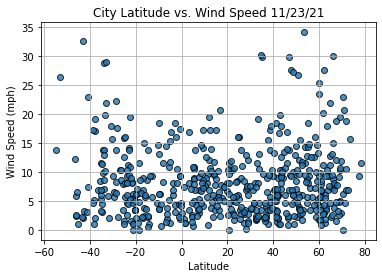

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.jpg")

# Show plot.
plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                          Gat
Country                        IL
Date          2021-11-23 16:51:09
Lat                         31.61
Lng                       34.7642
Max Temp                     66.4
Humidity                      100
Cloudiness                      1
Wind Speed                   4.56
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Talnakh,RU,2021-11-23 16:51:05,69.4865,88.3972,9.43,90,98,11.95
3,Vanavara,RU,2021-11-23 16:51:06,60.3400,102.2797,10.20,99,95,4.07
4,Albany,US,2021-11-23 16:51:06,42.6001,-73.9662,37.15,51,4,1.01
5,San Policarpo,PH,2021-11-23 16:51:06,12.1791,125.5072,80.29,84,99,12.08
6,Grindavik,IS,2021-11-23 16:51:07,63.8424,-22.4338,34.27,86,75,6.91


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

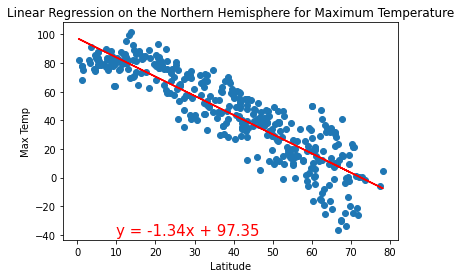

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,-40))

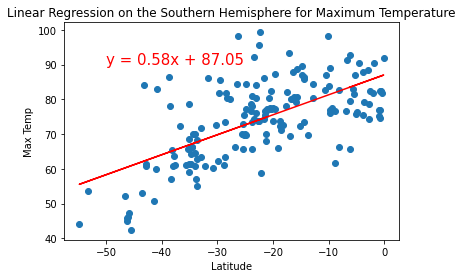

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

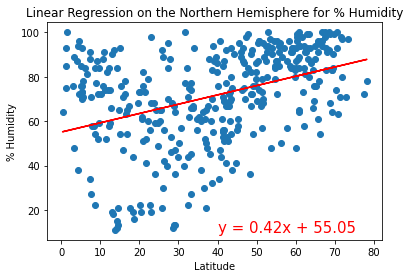

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

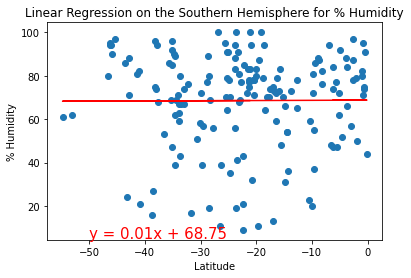

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,5))

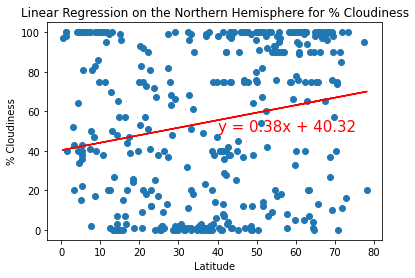

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,50))

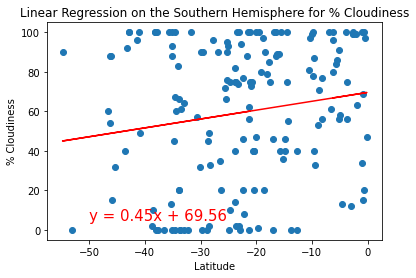

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,5))

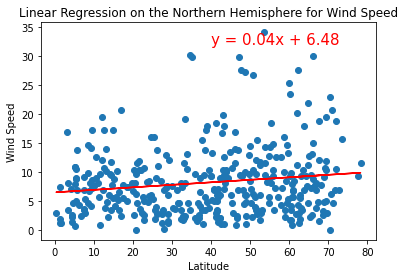

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,32))

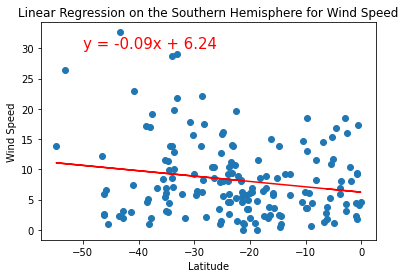

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,30))